# Dendrogram

- A dendrogram is a type of diagram that is used to visualize the hierarchical relationship between different objects, such as clusters of data points or groups of organisms in a taxonomic tree. It is often used in data science and biology to display the results of cluster analysis, which groups similar objects together based on their characteristics.

- The dendrogram consists of a series of branches that represent the objects being clustered, with the length of each branch indicating the degree of similarity between the objects it connects. The objects that are most similar are located closest together on the diagram, while those that are less similar are located further apart.

- Dendrograms are commonly used in fields such as biology, where they can be used to visualize the evolutionary relationships between different species or groups of organisms. In data science, dendrograms can be used to analyze and visualize patterns in large datasets, and to identify groups or clusters of similar data points.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('PECVD Randomly Generated Data.csv')
data

,Pwr.(w),TFR (mg/min),O2-Lo (cc/m),Temp(C),Pres.(torr),Total He Carrier (sccm),k value
0,960.0,5300.0,343.0,360.0,9.2,1225.0,2.848258
1,650.0,3000.0,68.0,340.0,10.2,1475.0,3.245444
2,1030.0,4800.0,58.0,380.0,4.7,550.0,3.953603
3,920.0,4800.0,438.0,380.0,4.7,1125.0,3.080942
4,500.0,4700.0,53.0,380.0,8.2,1200.0,3.749117
...,...,...,...,...,...,...,...
19995,630.0,4500.0,48.0,380.0,4.7,950.0,3.348780
19996,670.0,4600.0,108.0,380.0,8.2,1025.0,2.845660
19997,990.0,4700.0,63.0,380.0,5.2,1000.0,3.224239
19998,1020.0,4800.0,313.0,340.0,9.2,925.0,3.541268


In [18]:
#
data.describe()

,Pwr.(w),TFR (mg/min),O2-Lo (cc/m),Temp(C),Pres.(torr),Total He Carrier (sccm),k value
count,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,701.225000,3296.92500,139.112000,350.902000,7.840775,998.283750,3.332532
std,213.596115,1517.28908,105.871899,31.415215,1.687131,292.666074,0.318421
min,200.000000,600.00000,8.000000,200.000000,4.700000,475.000000,2.627023
25%,540.000000,1600.00000,53.000000,320.000000,6.700000,750.000000,3.073940
50%,720.000000,3700.00000,113.000000,360.000000,8.200000,1000.000000,3.333074
75%,890.000000,4600.00000,198.000000,380.000000,9.200000,1225.000000,3.584296
max,1040.000000,5400.00000,448.000000,380.000000,10.200000,1475.000000,4.395353


6 process conditions and 1 target feature `k value`. 

In [4]:
#
from scipy.stats import pearsonr

In [8]:
#
only_process_conditions = data.iloc[:,0:6]
only_process_conditions

,Pwr.(w),TFR (mg/min),O2-Lo (cc/m),Temp(C),Pres.(torr),Total He Carrier (sccm)
0,960.0,5300.0,343.0,360.0,9.2,1225.0
1,650.0,3000.0,68.0,340.0,10.2,1475.0
2,1030.0,4800.0,58.0,380.0,4.7,550.0
3,920.0,4800.0,438.0,380.0,4.7,1125.0
4,500.0,4700.0,53.0,380.0,8.2,1200.0
...,...,...,...,...,...,...
19995,630.0,4500.0,48.0,380.0,4.7,950.0
19996,670.0,4600.0,108.0,380.0,8.2,1025.0
19997,990.0,4700.0,63.0,380.0,5.2,1000.0
19998,1020.0,4800.0,313.0,340.0,9.2,925.0


In [9]:
#
pearson_corr = np.zeros((6,6))
pearson_corr

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [10]:
#
for i in range(6):
        for j in range(6):
            corr, _ = pearsonr(data.iloc[:,i], data.iloc[:,j])
            pearson_corr[i,j] = corr

In [13]:
#
column_names = data.columns[:6]
column_names

Index(['   Pwr.(w)', 'TFR (mg/min)', 'O2-Lo (cc/m)', 'Temp(C)', 'Pres.(torr)',
       'Total He Carrier (sccm)'],
      dtype='object')

In [27]:
#
pearson_corr = np.round(pearson_corr, decimals = 5)
pearson_corr = pd.DataFrame(pearson_corr, columns=column_names, index=column_names)
pearson_corr = np.absolute(pearson_corr)
pearson_corr

,Pwr.(w),TFR (mg/min),O2-Lo (cc/m),Temp(C),Pres.(torr),Total He Carrier (sccm)
Pwr.(w),1.00000,0.26773,0.41095,0.14459,0.01556,0.00319
TFR (mg/min),0.26773,1.00000,0.14074,0.40878,0.21540,0.10054
O2-Lo (cc/m),0.41095,0.14074,1.00000,0.00392,0.17962,0.19974
Temp(C),0.14459,0.40878,0.00392,1.00000,0.53200,0.07968
Pres.(torr),0.01556,0.21540,0.17962,0.53200,1.00000,0.16499
Total He Carrier (sccm),0.00319,0.10054,0.19974,0.07968,0.16499,1.00000


In [29]:
pearson_corr[pearson_corr == 1] = 0
pearson_corr

,Pwr.(w),TFR (mg/min),O2-Lo (cc/m),Temp(C),Pres.(torr),Total He Carrier (sccm)
Pwr.(w),0.00000,0.26773,0.41095,0.14459,0.01556,0.00319
TFR (mg/min),0.26773,0.00000,0.14074,0.40878,0.21540,0.10054
O2-Lo (cc/m),0.41095,0.14074,0.00000,0.00392,0.17962,0.19974
Temp(C),0.14459,0.40878,0.00392,0.00000,0.53200,0.07968
Pres.(torr),0.01556,0.21540,0.17962,0.53200,0.00000,0.16499
Total He Carrier (sccm),0.00319,0.10054,0.19974,0.07968,0.16499,0.00000


In [30]:
#
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import euclidean, pdist, squareform

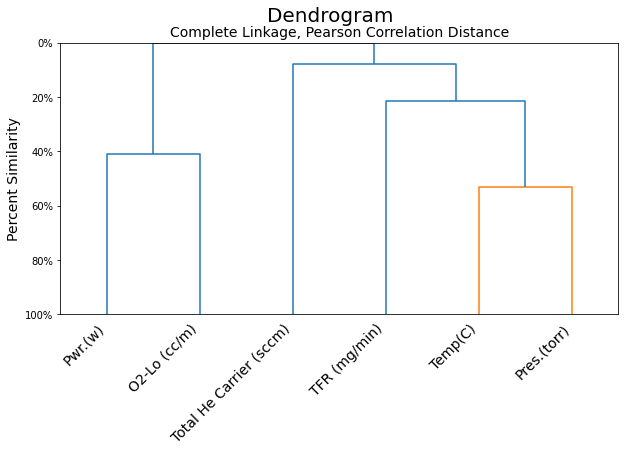

In [31]:
#
Z = linkage((1- squareform(pearson_corr)), 'complete')

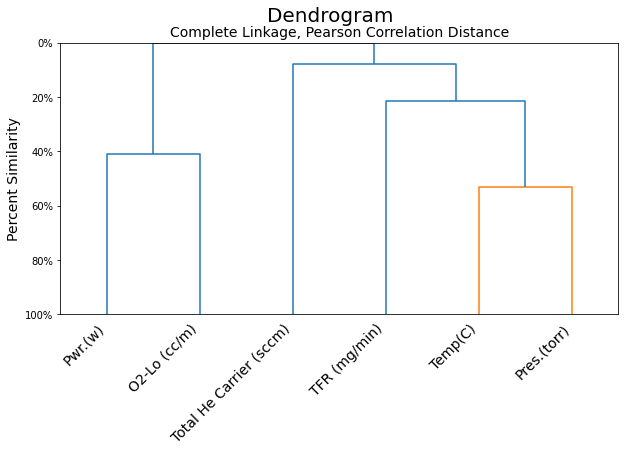

In [35]:
#
fig = plt.figure(figsize=(10,5))
ax = plt.axes()

#
parameter_name = ['Pwr.(w)','TFR (mg/min)','O2-Lo (cc/m)','Temp(C)','Pres.(torr)','Total He Carrier (sccm)']

#
dendrogram(Z, labels = parameter_name, color_threshold=0.5)

#
plt.suptitle('Dendrogram',fontsize = 20)
plt.title('Complete Linkage, Pearson Correlation Distance',fontsize = 14)
plt.ylabel('Percent Similarity', fontsize = 14)
plt.xticks(fontsize = 14,rotation = 45, horizontalalignment='right')
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels(['100%', '80%','60%','40%','20%','0%'])
plt.ylim((0,1))

#
plt.show()